## MNIST 실습

In [1]:
import tensorflow as tf

### Data 불러오기

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

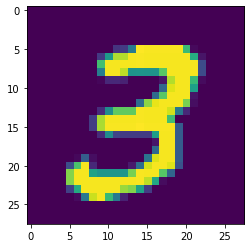

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_images[7])
plt.show()

In [4]:
train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28*28) / 255.0
test_images = test_images[:1000].reshape(-1, 28*28) / 255.0

In [5]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(1000, 784)
(1000, 784)
(1000,)
(1000,)


### 모델 정의

In [6]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [9]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 체크포인트 콜백 사용하기

In [ ]:
import os

checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weight_only=True,
                                                verbose=1)

model.fit(train_images, train_labels,
          epochs=10,
          validation_data = (test_images, test_labels),
          callbacks = [cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10


### 모델측정

In [ ]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('정확도:{:5.2f}%'.format(acc*100))

### 체크포인트 콜백 매개변수

In [ ]:
checkpoint_path = 'training_2/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                save_freq=5)

In [ ]:
model = create_model()

In [ ]:
model.fit(train_images, train_labels,
          epochs=20,
          validation_data = (test_images, test_labels),
          callbacks = [cp_callback],
          verbose=2)

model.save_weights(checkpoint_path.format(epoch=0))

## H5 확장자로 저장하기

In [ ]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

model.save('training_1/mnist.h5')

In [ ]:
# 저장한 학습 모델을 로드해서 사용하기
new_model = tf.keras.models.load_model('mnist.h5')
new_model.summary()

In [ ]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)

### Early Stopping & Checkpoint

In [ ]:
callback = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                    patience=1),
    tf.keras.callbacks.ModelCheckpoint(
    filepath='mnist_2.h5',
    monitor='val_accuracy',
    save_best_only=True)
]

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=20,
          batch_size=10,
          callbacks=callback,
          validation_data=(test_images, test_labels))

In [7]:
mkdir my_log_dir

In [9]:
model = create_model()

# 코드 7-8 텐서보드 로그 파일을 위한 디렉터리 생성하기
callbacks = [
  tf.keras.callbacks.TensorBoard(
    log_dir='my_log_dir', # 저장될 path
    histogram_freq=1, # 1 에포크마다 활성화 출력의 히스토그램을 기록
    embeddings_freq=1) # 1 에포크마다 임베딩 데이터를 기록
]

hitory = model.fit(train_images, train_labels, 
                   batch_size=128,
                   epochs=20,
                   validation_split=0.2, 
                   callbacks=callbacks)

Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 1s 2ms/sample - loss: 2.1517 - accuracy: 0.2738 - val_loss: 1.7277 - val_accuracy: 0.6900
Epoch 2/20
800/800 [==============================] - 0s 326us/sample - loss: 1.5215 - accuracy: 0.6313 - val_loss: 1.0696 - val_accuracy: 0.7800
Epoch 3/20
800/800 [==============================] - 0s 397us/sample - loss: 0.9569 - accuracy: 0.7625 - val_loss: 0.7359 - val_accuracy: 0.8050
Epoch 4/20
800/800 [==============================] - 0s 415us/sample - loss: 0.6617 - accuracy: 0.8087 - val_loss: 0.5694 - val_accuracy: 0.8500
Epoch 5/20
800/800 [==============================] - 0s 403us/sample - loss: 0.5066 - accuracy: 0.8400 - val_loss: 0.5212 - val_accuracy: 0.8500
Epoch 6/20
800/800 [==============================] - 0s 376us/sample - loss: 0.4137 - accuracy: 0.8662 - val_loss: 0.5030 - val_accuracy: 0.8650
Epoch 7/20
800/800 [==============================] - 0s 393us/sample - loss: 0.

In [10]:
 !tensorboard --logdir=my_log_dir

TensorBoard 1.15.0 at http://Joshui-MacBook-Pro.local:6006/ (Press CTRL+C to quit)
^C
